# Computer Vision Labsheet 1

## Geomtric Transformation

### Name: Aniketh Vijesh
### Roll No: AM.EN.U4AIE222009

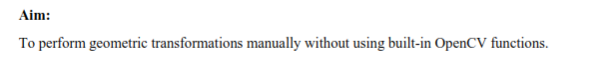

In [28]:
import os 
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt

## To Do:

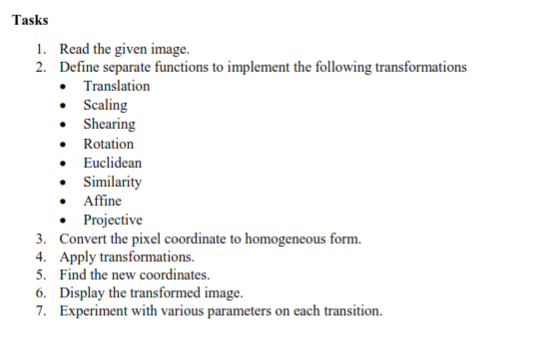

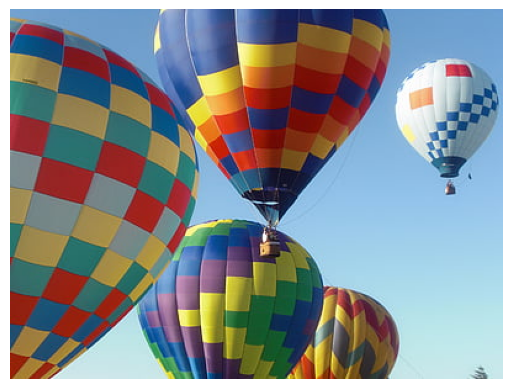

In [29]:
image_path = os.path.join('./Lab 1.jpg')
image = np.array(PIL.Image.open(image_path))
plt.imshow(image)
plt.axis('off')
plt.show()


In [30]:
print(image.shape)

(300, 400, 3)


In [31]:
# Defining functions for transformation
def translate(image, tx, ty):
    rows, cols = image.shape[:2]
    image_transformed = np.zeros_like(image)
    
    for i in range(rows):
        for j in range(cols):
            new_i = i+tx
            new_j = j+ty
            if 0 <= new_i < rows and 0 <= new_j < cols:
                image_transformed[new_i, new_j] = image[i,j]
    return image_transformed


def translate_using_matrix(image, tx, ty):
    rows, cols = image.shape[:2]
    tranformation_matrix = np.array([1,0,tx], [0,1,ty], [0,0,1])
    
    

In [32]:
def generate_translate_matrix(tx, ty):
    return np.array([[1,0,tx], 
                    [0,1,ty], 
                    [0,0,1]])

def generate_scaling_matrix(sx, sy):
    return np.array([[sx,0,0], 
                    [0,sy,0], 
                    [0,0,1]])

def generate_shearing_matrix(shx, shy):
    return np.array([[1,shx,0], 
                    [shy,1,0], 
                    [0,0,1]])

def generate_rotation_matrix(theta):
    return np.array([[np.cos(theta),-np.sin(theta),0], 
                    [np.sin(theta),np.cos(theta),0], 
                    [0,0,1]])

def generate_euclidean_matrix(tx, ty, theta):
    return np.array([[np.cos(theta),-np.sin(theta),tx], 
                    [np.sin(theta),np.cos(theta),ty], 
                    [0,0,1]])

def generate_similarity_matrix(tx, ty, theta, s):
    return np.array([[s*np.cos(theta),-s*np.sin(theta),tx], 
                    [s*np.sin(theta),s*np.cos(theta),ty], 
                    [0,0,1]])

def generate_affine_matrix(a11, a12, a21, a22, tx, ty):
    return np.array([[a11,a12,tx], 
                    [a21,a22,ty], 
                    [0,0,1]])

def generate_projective_matrix(h11, h12, h13, h21, h22, h23, h31, h32):
    return np.array([[h11,h12,h13], 
                    [h21,h22,h23], 
                    [h31,h32,1]])

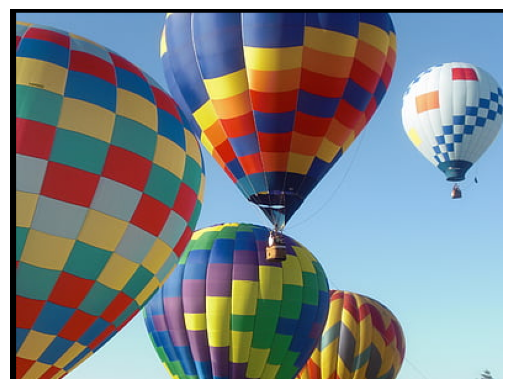

In [33]:
translated_image = translate(image, 3,5)
plt.imshow(translated_image)
plt.axis('off')
plt.show()


In [34]:
print(image.shape[:2])

(300, 400)


In [39]:
def transform_image_with_matrix(image_array, transformation_matrix):
    rows, cols = image_array.shape[:2]
    transformation_matrix = transformation_matrix.astype(np.float32)
    return cv2.warpPerspective(image_array, transformation_matrix, (cols, rows))


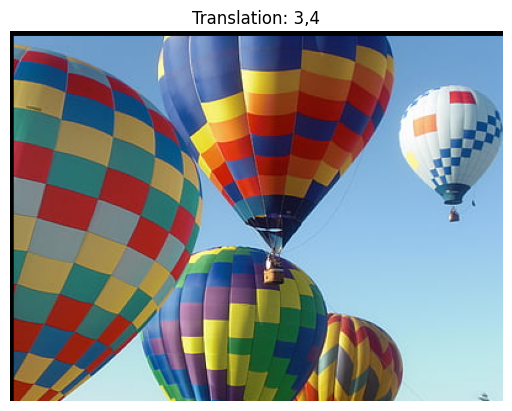

In [42]:
transformed_image = transform_image_with_matrix(image, generate_translate_matrix(3,4))
plt.imshow(transformed_image)
plt.title('Translation: 3,4')
plt.axis('off')
plt.show()

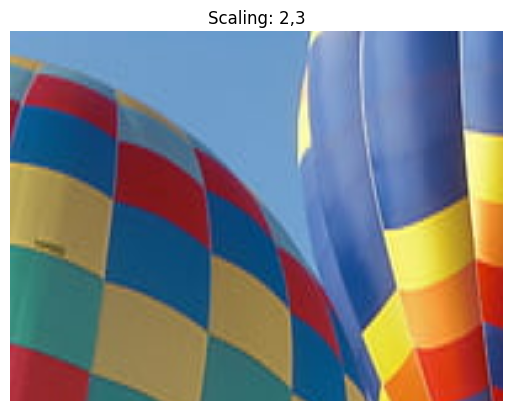

In [43]:
transformed_image = transform_image_with_matrix(image, generate_scaling_matrix(2,3))
plt.imshow(transformed_image)
plt.title('Scaling: 2,3')
plt.axis('off')
plt.show()

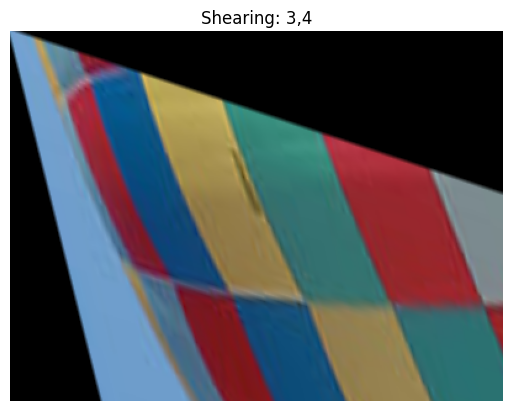

In [44]:
transformed_image = transform_image_with_matrix(image, generate_shearing_matrix(3,4))
plt.imshow(transformed_image)
plt.title('Shearing: 3,4')
plt.axis('off')
plt.show()

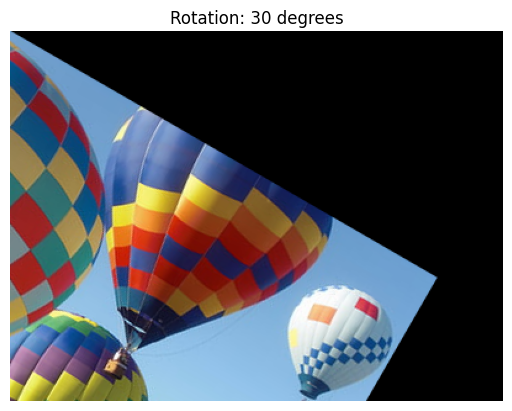

In [45]:
transformed_image = transform_image_with_matrix(image, generate_rotation_matrix(np.pi/6))
plt.imshow(transformed_image)
plt.title('Rotation: 30 degrees')
plt.axis('off')
plt.show()

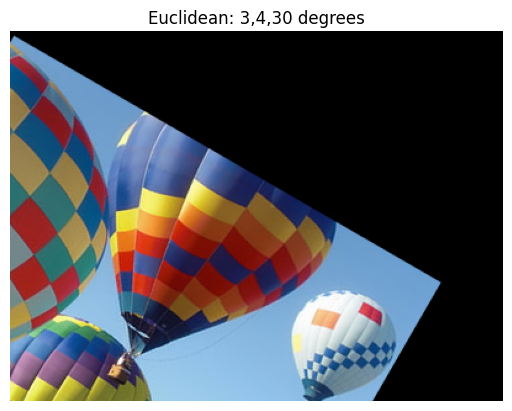

In [46]:
transformed_image = transform_image_with_matrix(image, generate_euclidean_matrix(3,4,np.pi/6))
plt.imshow(transformed_image)
plt.title('Euclidean: 3,4,30 degrees')
plt.axis('off')
plt.show()

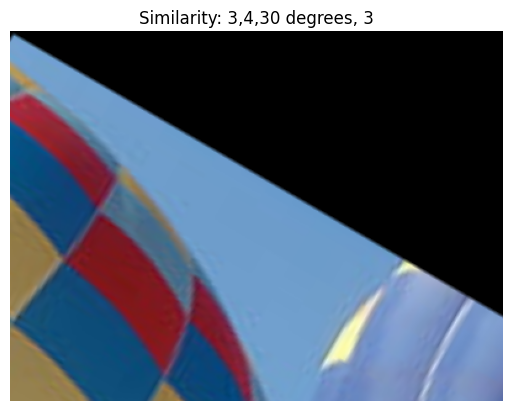

In [48]:
transformed_image = transform_image_with_matrix(image, generate_similarity_matrix(3,4,np.pi/6, 3))
plt.imshow(transformed_image)
plt.title('Similarity: 3,4,30 degrees, 3')
plt.axis('off')
plt.show()

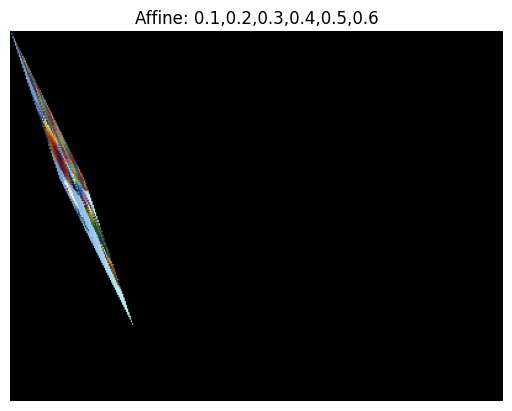

In [51]:
transformed_image = transform_image_with_matrix(image, generate_affine_matrix(0.1,0.2,0.3,0.4,0.5,0.6))
plt.imshow(transformed_image)
plt.title('Affine: 0.1,0.2,0.3,0.4,0.5,0.6')
plt.axis('off')
plt.show()

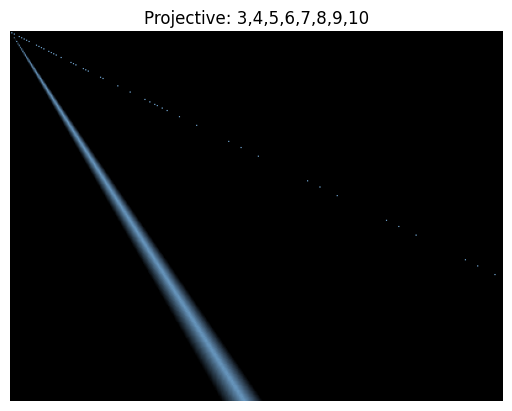

In [50]:
transformed_image = transform_image_with_matrix(image, generate_projective_matrix(3,4,5,6,7,8,9,10))
plt.imshow(transformed_image)
plt.title('Projective: 3,4,5,6,7,8,9,10')
plt.axis('off')
plt.show()